# Part 1- Present overview Deep learning using the following paper
https://link.springer.com/article/10.1007/s42979-021-00815-1

# Part 2- Image Classification on Fashion-MNIST.

The objective of this project is to predict fashion classes such as pants, shirts, and shoes from grayscale images. This guided project is practical and directly applicable to the fashion industry. You can add this project to your portfolio of projects which is essential for your next job interview.
Learning Objectives
________________________________________
•	Perform data cleaning, feature engineering and visualization
•	Understand the theory and intuition behind artificial neural networks
•	Build, train and test an artificial neural network model in Keras and Tensorflow
Overview of Health Care Systems and


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [69]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical #tensorflow.
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam #tensorflow.
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [70]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [71]:
# Use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

In [72]:
X_train.shape

(60000, 28, 28)

In [73]:
y_train.shape

(60000,)

In [74]:
X_test.shape

(10000, 28, 28)

In [75]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

2


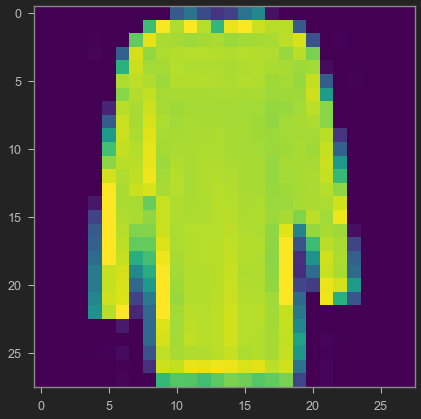

In [76]:
# Select a sample image and visualize it
i = 350 #id of image
plt.imshow(X_train[i])
print(y_train[i])


**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 144 images and perform a sanity check on the data**

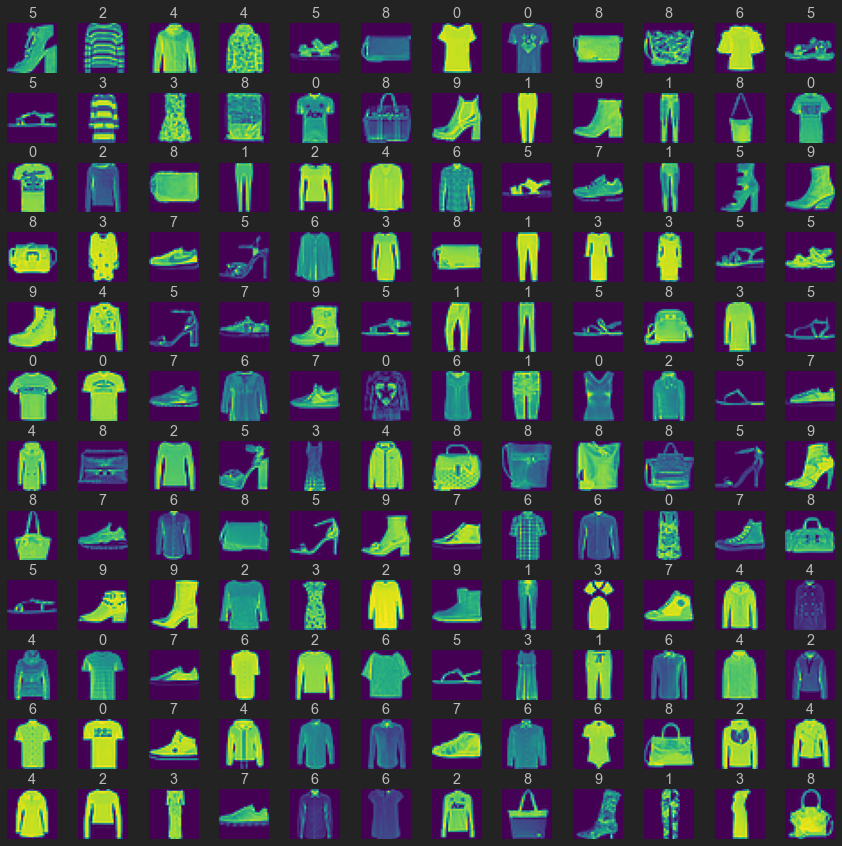

In [77]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)



# TASK #4: PREPARE THE DATA FOR TRAINING

In [78]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [79]:
number_cat = 10 #number of categories
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
#chuyển đổi các nhãn của tập y_train bằng one-hot coding
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
X_train.shape

(60000, 28, 28)

In [81]:
y_train.shape

(60000, 10)

In [82]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [83]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [84]:
X_train.shape

(60000, 28, 28)

In [85]:
X_train = np.expand_dims(X_train, axis=-1) #tạo thêm chiều cho mảng vì ảnh đang ở dạng ảnh xám

In [86]:
X_train.shape

(60000, 28, 28, 1)

In [87]:
y_train.shape

(60000, 10)

# TASK #5: BUILD A DEEP LEARNING MODEL

![image.png](attachment:image.png)

In [88]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential() #mô hình tuần tự

cnn.add(layers.Conv2D(32,(3,3), activation =  'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64,(3,3)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64,(3,3), activation =  'relu'))

cnn.add(layers.Flatten()) #thêm lớp Flatten để chuyển đổi đầu ra từ lớp Convolutional cuối cùng thành một vector 1D

cnn.add(layers.Dense(64, activation =  'relu'))
cnn.add(layers.Dense(512,activation = 'relu'))
cnn.add(layers.Dense(1024, activation = 'relu'))

cnn.add(layers.Dense(10, activation =  'softmax'))

cnn.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL

In [89]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss ='categorical_crossentropy', metrics =['accuracy'])

In [90]:
X_train.shape

(60000, 28, 28, 1)

In [91]:
epochs = 30
history =  cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/30
118/118 [==============================] - 11s 85ms/step - loss: 0.9277 - accuracy: 0.6917
Epoch 2/30
118/118 [==============================] - 10s 87ms/step - loss: 0.5600 - accuracy: 0.7918
Epoch 3/30
118/118 [==============================] - 10s 87ms/step - loss: 0.4849 - accuracy: 0.8178
Epoch 4/30
118/118 [==============================] - 11s 90ms/step - loss: 0.4397 - accuracy: 0.8373
Epoch 5/30
118/118 [==============================] - 11s 91ms/step - loss: 0.4047 - accuracy: 0.8505
Epoch 6/30
118/118 [==============================] - 10s 86ms/step - loss: 0.3774 - accuracy: 0.8608
Epoch 7/30
118/118 [==============================] - 10s 83ms/step - loss: 0.3554 - accuracy: 0.8687
Epoch 8/30
118/118 [==============================] - 10s 83ms/step - loss: 0.3370 - accuracy: 0.8760
Epoch 9/30
118/118 [==============================] - 10s 85ms/step - loss: 0.3232 - accuracy: 0.8802
Epoch 10/30
118/118 [==============================] - 10s 84ms/step - loss: 0.306

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [92]:
X_test.shape

(10000, 28, 28)

In [93]:
X_test = np.expand_dims(X_test, axis=-1)

In [94]:
y_test.shape

(10000, 10)

In [95]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.8802


[0.38218629360198975, 0.8802000284194946]

In [96]:
X_test = X_test.astype('float')


In [97]:
predicted_classes = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [98]:
predicted_classes

array([[2.11497064e-09, 4.64253202e-12, 1.89611526e-09, ...,
        3.49939692e-05, 1.51515267e-09, 9.99964833e-01],
       [1.11962876e-07, 9.01730100e-17, 9.99999881e-01, ...,
        6.64412379e-17, 4.36727876e-11, 1.13000521e-16],
       [5.10379627e-10, 1.00000000e+00, 5.33286491e-16, ...,
        1.29549137e-19, 1.92888185e-15, 8.88518867e-18],
       ...,
       [8.98873736e-07, 2.26893171e-13, 1.23169434e-06, ...,
        1.15645471e-09, 9.99918699e-01, 1.87039047e-11],
       [4.86112181e-13, 1.00000000e+00, 4.07698181e-12, ...,
        2.06920540e-16, 1.80961372e-14, 5.27820062e-12],
       [6.53637748e-04, 1.10339136e-06, 1.05579449e-04, ...,
        4.93256927e-01, 8.74450896e-04, 1.70441368e-03]], dtype=float32)

In [99]:
predicted_classes=np.argmax(predicted_classes,axis=1) 


In [100]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [101]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
y_test = y_test.argmax(1)

In [103]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

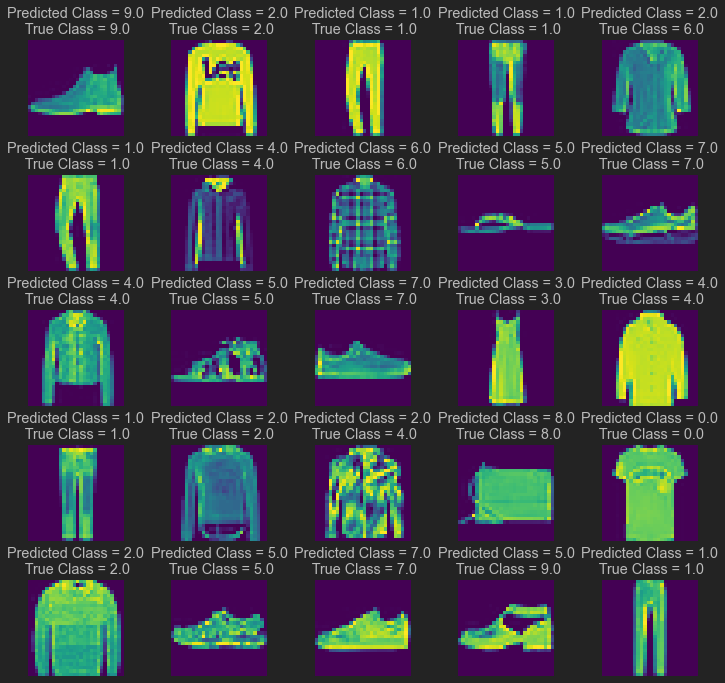

In [104]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

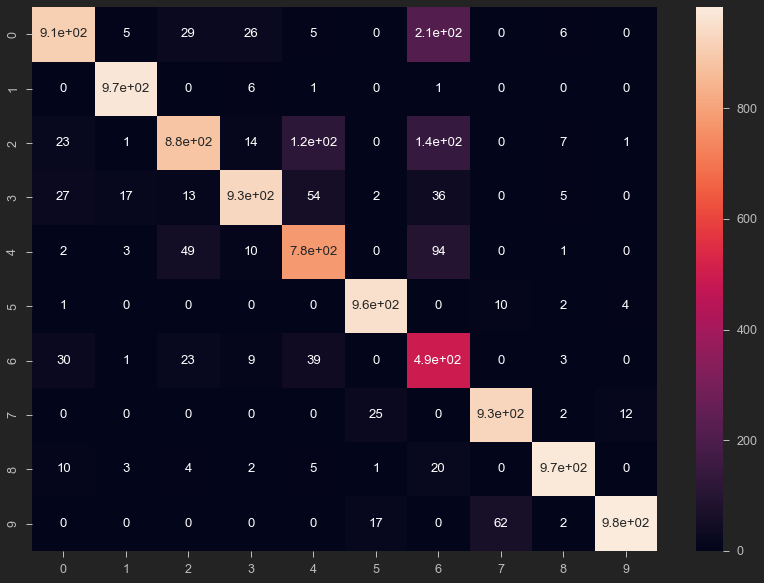

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes,y_test)
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot = True)

In [106]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.88      0.81      1000
           3       0.86      0.93      0.89      1000
           4       0.83      0.78      0.80      1000
           5       0.98      0.95      0.97      1000
           6       0.82      0.49      0.62      1000
           7       0.96      0.93      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

